In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm

data = pd.read_csv("data/NaIscanwindow_20220426_out.csv") #Change to match local file name/location
data5k = pd.read_csv("data/NaIscanwindow_20220426_4_out.csv")

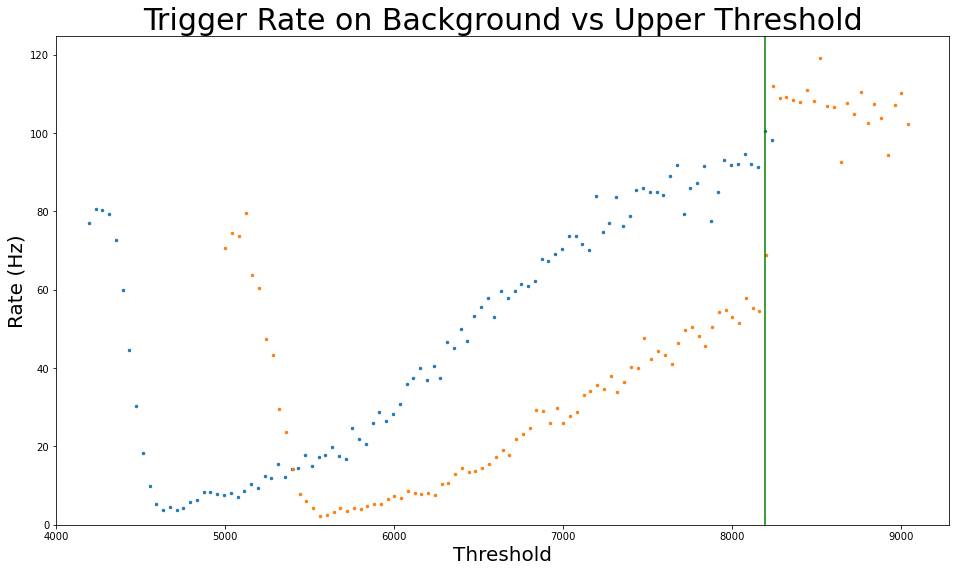

In [2]:
plt.figure(figsize=(16,9))

plt.scatter(data.iloc[:,0],data.iloc[:,1],s=6,label="4192")
plt.scatter(data5k.iloc[:,0],data5k.iloc[:,1],s=6,label="5000")
#plt.plot(data.iloc[:,0],data.iloc[:,1],label="interpolation",zorder=0,color="#AAAAAA")
plt.axvline(8192,color="green",label="8192")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Upper Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.xlim(4000)
plt.ylim(0)

#plt.legend(fontsize=18)
plt.show()

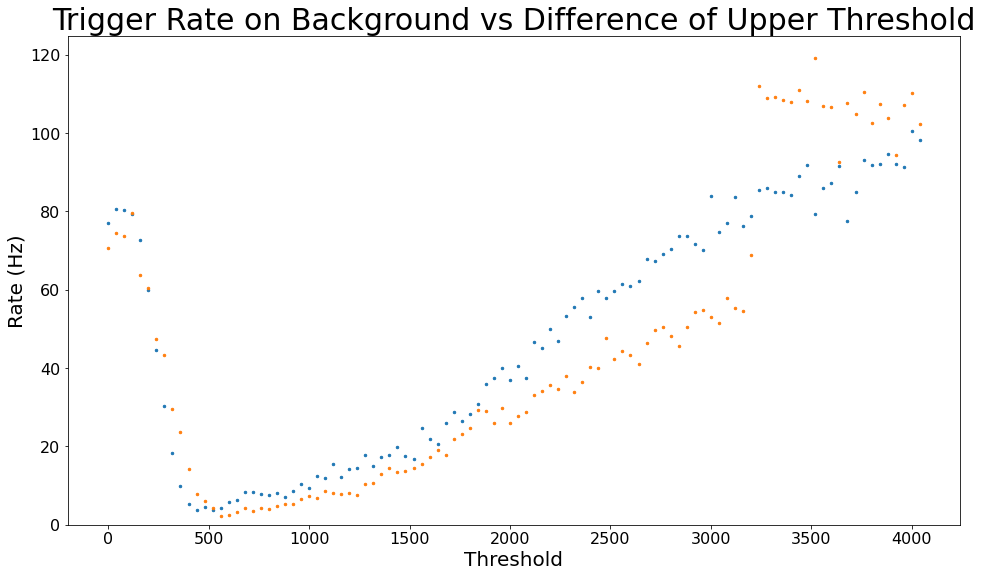

In [3]:
plt.figure(figsize=(16,9))

reldata = data - 4192
reldata5k = data5k - 5000

plt.scatter(reldata.iloc[:,0],data.iloc[:,1],s=6,label="4192")
plt.scatter(reldata5k.iloc[:,0],data5k.iloc[:,1],s=6,label="5000")

plt.xlabel("Threshold",size=20)
plt.ylabel("Rate (Hz)",size=20)
plt.title("Trigger Rate on Background vs Difference of Upper Threshold",size=30)
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
#plt.xlim(4000)
plt.ylim(0)

#plt.legend(fontsize=18)
plt.show()

In [4]:
plt.figure(figsize=(16,9))

histdata = data.iloc[:,1][data.iloc[:,0]>5500][data.iloc[:,0]<8000]
histdata5k = data5k.iloc[:,1][data5k.iloc[:,0]>5500][data5k.iloc[:,0]<8000]
bins = np.arange(min(histdata,histdata5k),max(histdata,histdata5k))

mean,std = norm.fit(histdata)
mean5k,std5k = norm.fit(histdata5k)

plt.hist(histdata,bins=bins,density=True,label="4192")
plt.hist(histdata5k,bins=bins,density=True,label="5000")
plt.plot(bins,norm.pdf(bins,mean,std),label="Gaussian fit 4192, mean "+str(mean)+", std "+str(std),color="#222222",linewidth=10)
plt.plot(bins,norm.pdf(bins,mean5k,std5k),label="Gaussian fit 5000, mean "+str(mean5k)+", std "+str(std5k),color="#222222",linewidth=10)

plt.title("Counts of Rates at Threshold 5500-8000",size=30)
plt.xlabel("Rate (Hz)",size=20)
plt.ylabel("Counts (Density)",size=20)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels

plt.legend(fontsize=18)
plt.show()

ValueError: Can only compare identically-labeled Series objects

<Figure size 1152x648 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,9))

histdata = data.iloc[:,1][data.iloc[:,0]>8192]
histdata5k = data5k.iloc[:,1][data5k.iloc[:,0]>8192]
bins = np.arange(histdata.min(),histdata.max())

mean,std = norm.fit(histdata)

plt.hist(histdata,bins=bins,density=True,label="4192")
plt.hist(histdata5k,bins=bins,density=True,label="5000")
plt.plot(bins,norm.pdf(bins,mean,std),label="Gaussian fit 4192, mean "+str(mean)+", std "+str(std),color="#222222",linewidth=10)

plt.title("Counts of Rates at Threshold > 8192",size=30)
plt.xlabel("Rate (Hz)",size=20)
plt.ylabel("Counts (Density)",size=20)
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels

plt.legend(fontsize=18)
plt.show()